# Importing libraries

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
#load dataset
df = pd.read_csv('sales-dataset.csv')

In [3]:
#display first five rows
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#display last five rows
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.shape

(200, 4)

In [6]:
#checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
# Some basic statistical analysis about the data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# Checking  summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Exploratory Data Analysis

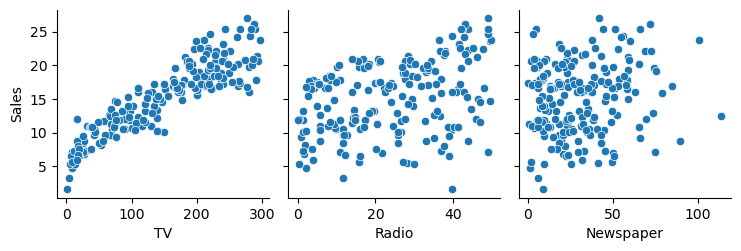

In [9]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

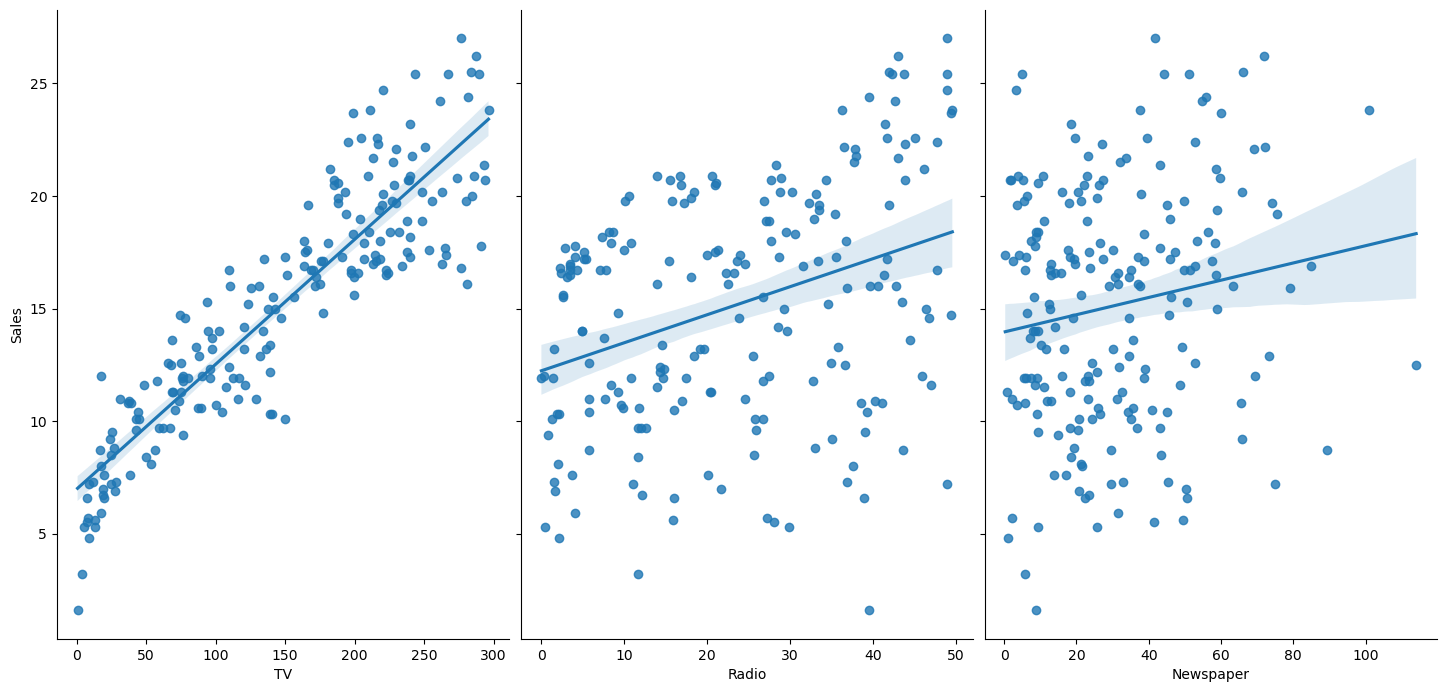

In [10]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=0.7,kind='reg')

<Axes: >

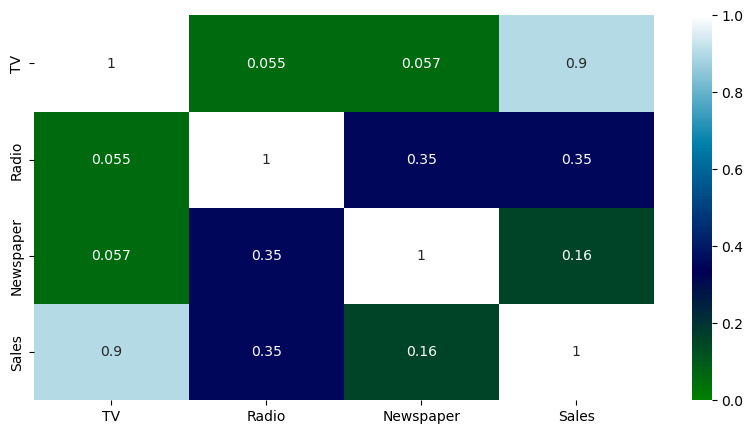

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')

# Model training

In [12]:
#preparing x and y matrix
feature_cols = ['TV','Radio','Newspaper']
X = np.array(df[feature_cols])
y = np.array(df['Sales'])

In [13]:
#splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

# Model evaluation

In [14]:
y_pred = linreg.predict(X_test)
print(linreg.score(X_test,y_test))

0.8495077592917368


# Model testing

In [15]:
#diff between actual data and predicted data
diff = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
diff.head()

,Actual,Predicted
0,16.1,16.620101
1,8.8,9.535547
2,16.6,18.127054
3,23.8,21.525682
4,17.0,19.510153


In [16]:
#calculate accuracy of the dataset
from sklearn import metrics
from sklearn.metrics import r2_score

R2 = r2_score(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('Accuracy = ',R2.round(2)*100,'%')
print('mae = ',mae.round(2))
print('mse = ',mse.round(2))
print('rmse = ',rmse.round(2))

Accuracy =  85.0 %
mae =  1.39
mse =  3.04
rmse =  1.74


<Axes: >

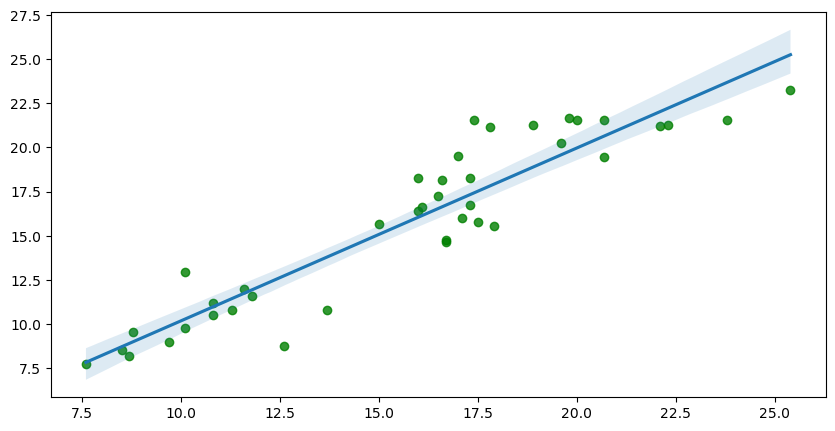

In [17]:
#regression graph
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'green'})